In [ ]:
# Reddit API Authentication steup

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/NegotiationPast5409"
reddit = praw.Reddit(
    client_id="IQleoMr_1Bq2UJbhG1ks-g",
    client_secret="gLrM8yfvJcq2L-wqXo3KROOICNEWyg",
    user_agent=user_agent
)

In [ ]:
Import libraries

In [2]:
import pandas as pd
import numpy as np
import re

C:\Users\anush\AppData\Local\Temp\ipykernel_42760\1346524901.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Trending Topics on word

In [3]:
# Picked a trending topic 
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

New Bitcoin Core release coming soon - help by testing it: 27.0 Release Candidate Testing Guide
1bk9i52
TheGreatMuffin
1711035599.0
55
0.95
https://github.com/bitcoin-core/bitcoin-devwiki/wiki/27.0-Release-Candidate-Testing-Guide
0


In [ ]:
# Selecting headlines of subreddits

In [4]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

707


In [ ]:
# Creating a Data frame on the Reddit

In [5]:
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,"My goal was to own 0.25 BTC, but then…"
1,Wait 10 years.
2,Bitcoin is treated like a risk asset
3,Upgrade Your Coldcard - Video Tutorial On How ...
4,Need help getting addresses of all current tra...


In [6]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
# Renamed Columns to Titles

In [7]:
bitcoin_df.columns = ['Titles']
bitcoin_df.head()

,Titles
0,"My goal was to own 0.25 BTC, but then…"
1,Wait 10 years.
2,Bitcoin is treated like a risk asset
3,Upgrade Your Coldcard - Video Tutorial On How ...
4,Need help getting addresses of all current tra...


In [ ]:
#Create a function to clean the tweets

In [8]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,"My goal was to own 0.25 BTC, but then…"
1,Wait 10 years.
2,Bitcoin is treated like a risk asset
3,Upgrade Your Coldcard - Video Tutorial On How ...
4,Need help getting addresses of all current tra...


In [ ]:
# To remove emoji & Unicode from the reddit data.

In [9]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,"My goal was to own 0.25 BTC, but then…"
1,Wait 10 years.
2,Bitcoin is treated like a risk asset
3,Upgrade Your Coldcard - Video Tutorial On How ...
4,Need help getting addresses of all current tra...


In [10]:
bitcoin_df.describe()

,Titles
count,707
unique,707
top,"My goal was to own 0.25 BTC, but then…"
freq,1


In [11]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Creating subjectivity and polarity

In [12]:
# subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,"My goal was to own 0.25 BTC, but then…",1.000000,0.600000
1,Wait 10 years.,0.000000,0.000000
2,Bitcoin is treated like a risk asset,0.000000,0.000000
3,Upgrade Your Coldcard - Video Tutorial On How ...,0.454545,0.136364
4,Need help getting addresses of all current tra...,0.400000,0.000000


In [ ]:
# Group the range of Polarity to different categories

In [13]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"My goal was to own 0.25 BTC, but then…",1.000000,0.600000,Positive
1,Wait 10 years.,0.000000,0.000000,Neutral
2,Bitcoin is treated like a risk asset,0.000000,0.000000,Neutral
3,Upgrade Your Coldcard - Video Tutorial On How ...,0.454545,0.136364,Positive
4,Need help getting addresses of all current tra...,0.400000,0.000000,Neutral
5,Ask your employer to add crypto ETFs to your 4...,0.000000,0.000000,Neutral
6,1 problem with bitcoin,0.000000,0.000000,Neutral
7,Bull Run confirmed. When the Daily Mail does a...,0.513889,0.036111,Positive
8,Trezor lost - can I use a hot wallet?,0.850000,0.250000,Positive
9,New pc doesn’t trust.,0.454545,0.136364,Positive


In [14]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Sentiment Analysis

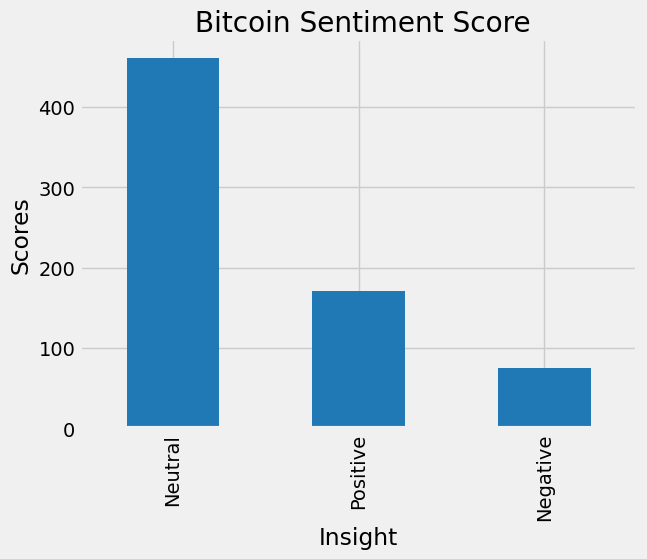

In [15]:
plt.title(" Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [ ]:
# Worldcloud

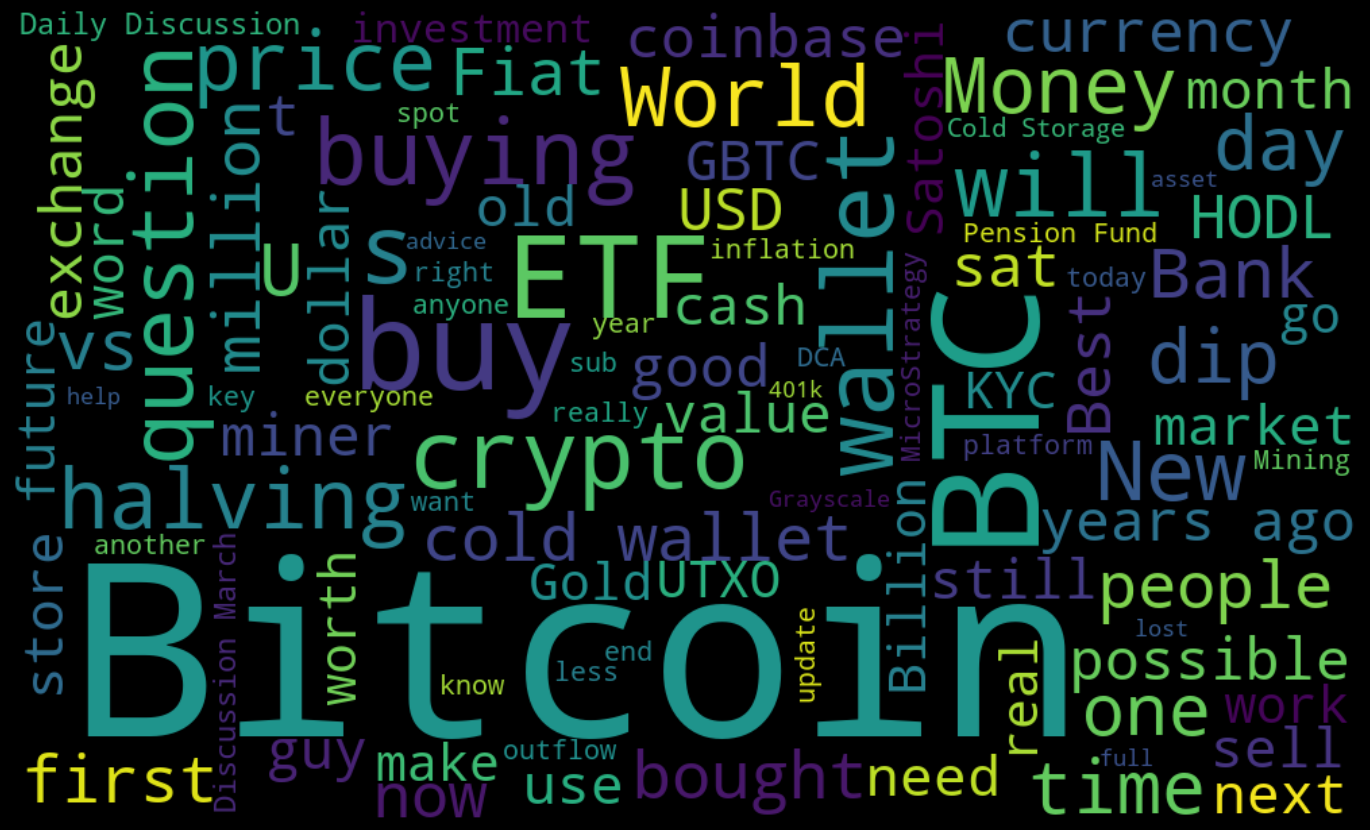

In [16]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");